In [2]:
import numpy as np
import pandas as pd
import os
import json
import csv
import wordcloud
import collections
from collections import Counter
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import scattertext
#import missingno as msno
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
os.chdir('D:\\My Documents\\Ryerson\\CIND820++\\yelpds')
cwd = os.getcwd()
print(cwd)

D:\My Documents\Ryerson\CIND820++\yelpds


In [4]:
mergedDF = pd.read_csv("MergedDF.csv")

In [3]:
reviewDF = pd.read_csv("reviewDF.csv")

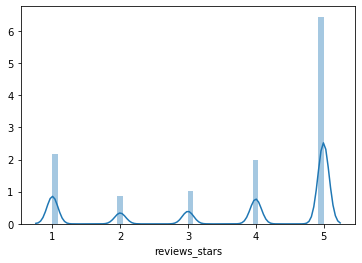

In [7]:
sns.distplot(mergedDF["reviews_stars"])

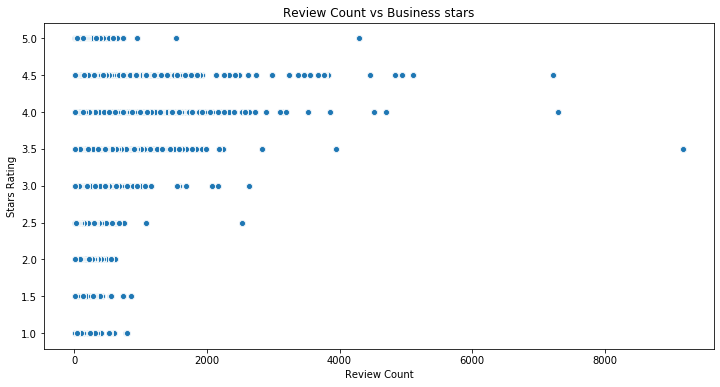

In [4]:
# Just looking at the number of reviews per star rating. 
# The highest number of reviews are for 4.5 and 4.0 ratings. 
# That gives us an idae of how most people write reviews when they have good things to say. 

plt.figure(figsize=(12,6))

sns.scatterplot(mergedDF['review_count'],mergedDF['business_stars'])
plt.title('Review Count vs Business stars')
plt.xlabel('Review Count')
plt.ylabel('Stars Rating')
plt.show()

In [9]:
# I am adding a column that shows whether the ratings are "low", "avg", or "high". 

mergedDF['rating'] = mergedDF['reviews_stars'].replace(
               {1:'Low Rating', 2:'Low Rating', 3:'Avg Rating',
                4:'High Rating', 5:'High Rating'})

In [28]:
# I want to look at only shopping category businesses right now, just to start off with a small subset. 

merged_shopping = mergedDF[mergedDF['categories'].str.contains('Shopping', na=False)]

In [29]:
merged_shopping.head()

,business_id,name,city,state,business_stars,review_count,attributes,categories,reviews_stars,useful,text,rating
94,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,Portland,OR,4.5,13,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...",5.0,1,I love the mid-century and vintage selection i...,High Rating
95,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,Portland,OR,4.5,13,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...",4.0,0,"Very small, niche sort of vintage shop. Go her...",High Rating
96,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,Portland,OR,4.5,13,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...",5.0,0,One of the prettiest small specialties stores ...,High Rating
164,N3_Gs3DnX4k9SgpwJxdEfw,Lane Wells Jewelry Repair,Austin,TX,5.0,30,"{'RestaurantsPriceRange2': '1', 'ByAppointment...","Shopping, Jewelry Repair, Appraisal Services, ...",5.0,0,I stopped in here today to inquire about fixin...,High Rating
165,N3_Gs3DnX4k9SgpwJxdEfw,Lane Wells Jewelry Repair,Austin,TX,5.0,30,"{'RestaurantsPriceRange2': '1', 'ByAppointment...","Shopping, Jewelry Repair, Appraisal Services, ...",5.0,0,My necklace broke and I brought it in to get f...,High Rating


In [30]:
merged_shopping.count()

business_id       195865
name              195865
city              195865
state             195865
business_stars    195865
review_count      195865
attributes        192535
categories        195865
reviews_stars     195865
useful            195865
text              195865
rating            195865
dtype: int64

In [16]:
nlp = spacy.load('en_core_web_sm')

In [22]:
# I want to be able to look at the count of words most frequently showing up 
# in the shopping dataset reviews. So I here I will try to break down the dataset
# and count the most frequently used words in the text reviews. 
# I could not run at the moment as it keeps timing out. I need to figure out a solution. 

def term_freq(merged_shopping):
    corpus = (scattertext.CorpusFromPandas(merged_shopping,
                                           category_col='rating', 
                                           text_col='text',
                                           nlp=nlp)
              .build()
              .remove_terms(nlp.Defaults.stop_words, ignore_absences=True)
              )
    df = corpus.get_term_freq_df()
    df['High_Rating_Score'] = corpus.get_scaled_f_scores('High Rating')
    df['Low_Rating_Score'] = corpus.get_scaled_f_scores('Low Rating')
    df['High_Rating_Score'] = round(df['High_Rating_Score'], 2)
    df['Low_Rating_Score'] = round(df['Low_Rating_Score'], 2)
    
    df_high = df.sort_values(by='High Rating freq', 
                             ascending = False).reset_index()
    df_low = df.sort_values(by='Low Rating freq', 
                            ascending=False).reset_index()
    return df_high, df_low

In [ ]:
shop_high, shop_low = term_freq(merged_shopping)

***

In [1]:
# Below, I really tried to count the most frequent words occurring in the text reviews. 
# However I was not able to complete this. It keeps crashing my laptop's memory. 
# So I still need to figure out how to complete this task.

In [6]:
count_words = Counter(reviewDF['text'])
c = Counter(count_words.elements())
print(c.most_common(1))

[('Are you kidding me? Anything less than 5 stars is just proof that some folks can never be happy! It\'s the "Magic Kingdom",.... buck up and get in there. Enjoy!', 39)]


In [ ]:
count_words = Counter(reviewDF['text'])
c = Counter(" ".join(count_words).split()).most_common(1)
print(c)

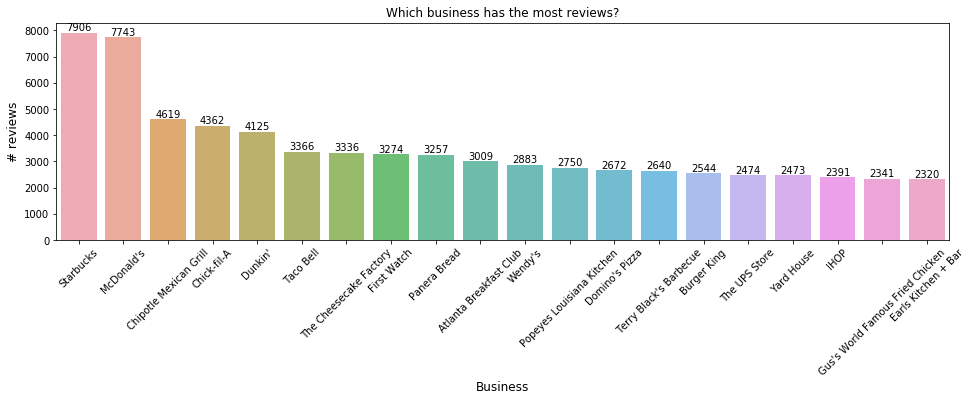

In [7]:
# Get the distribution of the ratings per business


x = mergedDF['name'].value_counts()
x = x.sort_values(ascending=False)
x = x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Which business has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# reviews', fontsize=12)
plt.xlabel('Business', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()